# Lab 1: Introduction to 3D Coordinate Systems and Transformations

<a href="https://colab.research.google.com/github/ferit-3d-computer-graphics/lab1/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Learning Objectives

In this lab, you will:

- Understand how points and objects are represented in 3D space.
- Learn about homogeneous coordinates and their purpose in 3D transformations.
- Apply geometric transformations including translation, rotation, and scaling.
- Use transformation matrices to manipulate 3D objects.
- Visualize the effects of these transformations using Python and `matplotlib`.

---

## Theoretical Background

### 1. 3D Coordinate Systems

In computer graphics, the 3D world is described using a **right-handed coordinate system**, where:

- The **X-axis** typically runs horizontally,
- The **Y-axis** runs vertically,
- The **Z-axis** comes out of or goes into the screen.

A point in 3D space is represented as a vector:  

$$ P = \begin{bmatrix} x \\ y \\ z \end{bmatrix} $$

### 2. Homogeneous Coordinates

To enable translation using matrix multiplication (which isn't possible in standard 3D vectors), we use **homogeneous coordinates**, which add a fourth component:

$$ \mathbf{P}_{\text{hom}} = \begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix} $$

This allows all transformations (including translation) to be expressed as **4×4 matrices**, unifying the way we apply transformations.

---

### 3. Transformation Matrices

In 3D graphics, objects are manipulated using **transformation matrices**:

- **Translation** (move object):
  $$
  T = \begin{bmatrix}
  1 & 0 & 0 & t_x \\\\
  0 & 1 & 0 & t_y \\\\
  0 & 0 & 1 & t_z \\\\
  0 & 0 & 0 & 1
  \end{bmatrix}
  $$

- **Scaling** (resize object):
  $$
  S = \begin{bmatrix}
  s_x & 0 & 0 & 0 \\\\
  0 & s_y & 0 & 0 \\\\
  0 & 0 & s_z & 0 \\\\
  0 & 0 & 0 & 1
  \end{bmatrix}
  $$

- **Rotation** (rotate around an axis, e.g., Z-axis):
  $$
  R_z(\\theta) = \begin{bmatrix}
  \cos\\theta & -\sin\\theta & 0 & 0 \\\\
  \sin\\theta & \cos\\theta & 0 & 0 \\\\
  0 & 0 & 1 & 0 \\\\
  0 & 0 & 0 & 1
  \end{bmatrix}
  $$

To apply a transformation to a point, we multiply:

$$
\mathbf{P}' = T \cdot R \cdot S \cdot \mathbf{P}_{\text{hom}}
$$

> ⚠️ Note: The order of transformations **matters**. Matrix multiplication is **not commutative**.

---

### 4. Practical Applications

These transformations are used in nearly every stage of a 3D graphics pipeline:

- **Modeling**: Position and scale objects in the scene.
- **Animation**: Rotate or move objects over time.
- **Camera**: Transform world coordinates into view coordinates.

By the end of this lab, you'll have an intuitive understanding of how these transformations work and how they affect 3D models.

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Utility function to draw 3D coordinate axes
def draw_axes(ax, origin=[0, 0, 0], length=2.0):
    ax.quiver(*origin, length, 0, 0, color='r', arrow_length_ratio=0.1)
    ax.quiver(*origin, 0, length, 0, color='g', arrow_length_ratio=0.1)
    ax.quiver(*origin, 0, 0, length, color='b', arrow_length_ratio=0.1)
    ax.text(origin[0]+length, origin[1], origin[2], 'X', color='r')
    ax.text(origin[0], origin[1]+length, origin[2], 'Y', color='g')
    ax.text(origin[0], origin[1], origin[2]+length, 'Z', color='b')

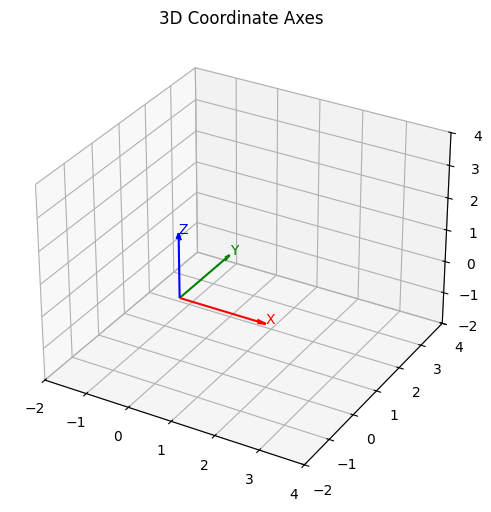

In [ ]:
# Plot coordinate system
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
draw_axes(ax)
ax.set_xlim([-2, 4])
ax.set_ylim([-2, 4])
ax.set_zlim([-2, 4])
ax.set_title("3D Coordinate Axes")
plt.show()

### Part 1: Basics of 3D coordinate space

### Example 1. Visualizing the 3D Coordinate Axes

In the visualization below, we render the three principal axes of the 3D coordinate system using colored arrows. The red arrow represents the **X-axis**, the green arrow represents the **Y-axis**, and the blue arrow represents the **Z-axis**. These axes originate from the point \((0, 0, 0)\), which is the **origin** of the 3D space.

The plot helps us understand the orientation and scale of the coordinate system, and it serves as a reference frame for placing and transforming 3D objects in future examples. The axis limits are set from \(-2\) to \(2\) in all directions for clarity and symmetry.

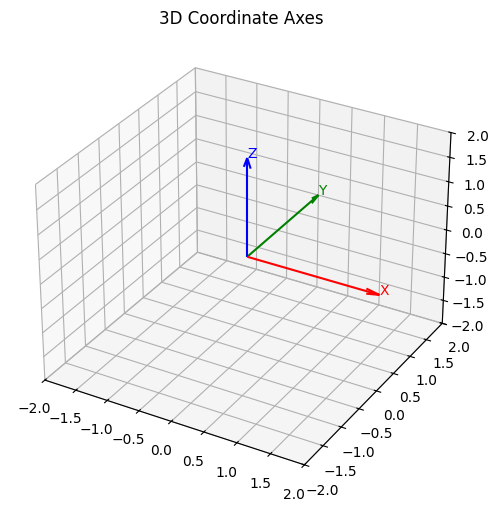

In [ ]:
# Part 1: Basics of 3D coordinate space
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
draw_axes(ax)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_title("3D Coordinate Axes")
plt.show()

## Homogeneous Coordinates

### Example 2: Applying diferent transformations

In 3D computer graphics, transformations such as translation, scaling, and rotation are often applied to objects using matrix operations. However, translation cannot be represented using standard $3 \times 3$ matrices. To unify all geometric transformations under matrix multiplication, we use **homogeneous coordinates**.

The extra component (usually set to 1) enables us to represent translation as a matrix operation. This expanded representation allows all transformations to be applied using a consistent **4×4 transformation matrix**. This approach simplifies the combination of multiple transformations (e.g., scaling followed by rotation and translation) into a single matrix multiplication.

In [ ]:
# define Homogeneous Coordinates
# A 3D point (x, y, z) is represented as (x, y, z, 1) in homogeneous coordinates
point = np.array([1, 1, 1, 1])
print("Original Point in Homogeneous Coordinates:", point)

Original Point in Homogeneous Coordinates: [1 1 1 1]


In [ ]:
# Define Transformation Matrices

def translation_matrix(tx, ty, tz):
    return np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]
    ])

def scaling_matrix(sx, sy, sz):
    return np.array([
        [sx, 0, 0, 0],
        [0, sy, 0, 0],
        [0, 0, sz, 0],
        [0, 0, 0, 1]
    ])

def rotation_matrix_x(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([
        [1, 0, 0, 0],
        [0, c, -s, 0],
        [0, s, c, 0],
        [0, 0, 0, 1]
    ])

def rotation_matrix_y(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([
        [c, 0, s, 0],
        [0, 1, 0, 0],
        [-s, 0, c, 0],
        [0, 0, 0, 1]
    ])

def rotation_matrix_z(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([
        [c, -s, 0, 0],
        [s, c, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

In [ ]:
# Applying transformations
T = translation_matrix(2, 0, 0)
S = scaling_matrix(1, 2, 1)
R = rotation_matrix_z(np.pi / 4)  # 45 degrees
combined_transform = T @ R @ S
transformed_point = combined_transform @ point
print("Transformed Point:", transformed_point)

Transformed Point: [1.29289322 2.12132034 1.         1.        ]


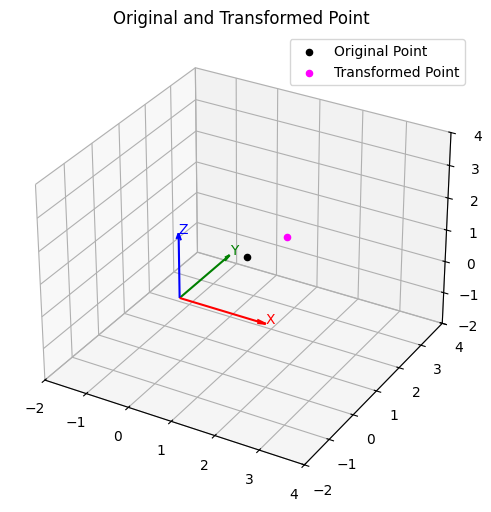

In [ ]:
# Visualizing transformations
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
draw_axes(ax)
ax.scatter(*point[:3], color='black', label='Original Point')
ax.scatter(*transformed_point[:3], color='magenta', label='Transformed Point')
ax.legend()
ax.set_xlim([-2, 4])
ax.set_ylim([-2, 4])
ax.set_zlim([-2, 4])
ax.set_title("Original and Transformed Point")
plt.show()

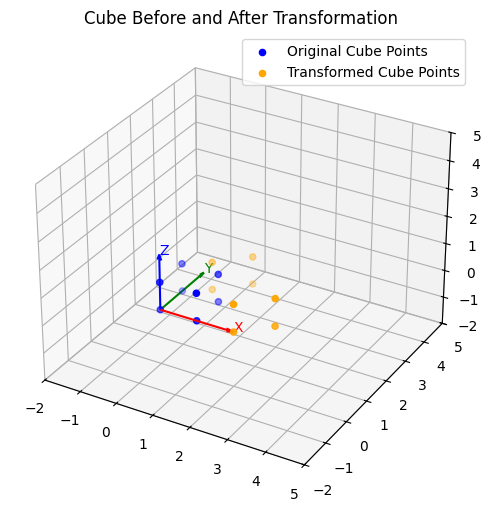

In [ ]:
# Transforming a set of points (e.g. a cube)
cube_points = np.array([
    [0, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 1, 1],
    [0, 1, 1, 1]
])

transformed_cube = (combined_transform @ cube_points.T).T

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
draw_axes(ax)
ax.scatter(cube_points[:,0], cube_points[:,1], cube_points[:,2], color='blue', label='Original Cube Points')
ax.scatter(transformed_cube[:,0], transformed_cube[:,1], transformed_cube[:,2], color='orange', label='Transformed Cube Points')
ax.legend()
ax.set_xlim([-2, 5])
ax.set_ylim([-2, 5])
ax.set_zlim([-2, 5])
ax.set_title("Cube Before and After Transformation")
plt.show()

### Example 3: Transforming a Cube

In this example, we demonstrate how a 3D cube can be transformed using homogeneous transformation matrices. We first define the cube as a set of 8 vertices in homogeneous coordinates. Then, we define a sequence of transformations.

he plot shows:
- The **original cube** in blue (dashed lines)
- The **transformed cube** in orange (solid lines)

This visually demonstrates how transformation matrices can change the position, orientation, and size of a 3D object.

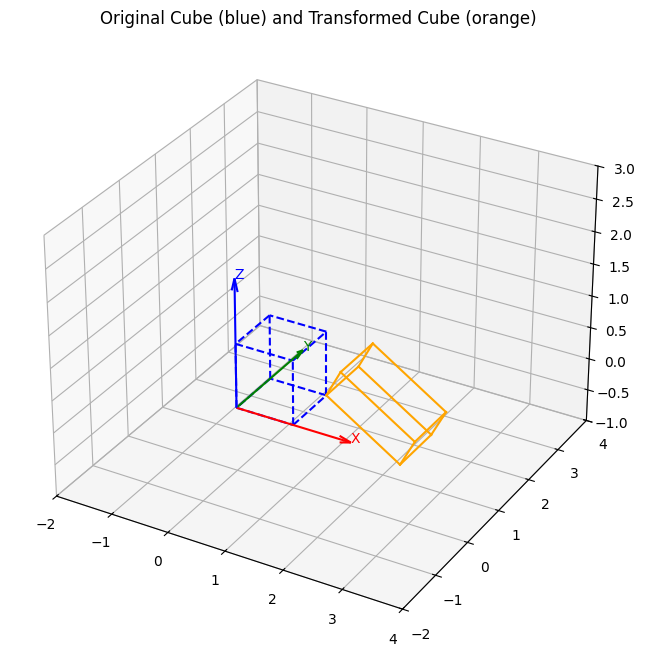

In [ ]:
# Transforming a Cube Using Homogeneous Coordinates

# Define the 8 vertices of a unit cube in homogeneous coordinates
cube_vertices = np.array([
    [0, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 1, 1],
    [0, 1, 1, 1]
])

# Define the edges of the cube (pairs of vertex indices)
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

# Create a combined transformation
T = translation_matrix(1, 1, 0)
S = scaling_matrix(1.5, 1, 0.5)
R = rotation_matrix_y(np.pi / 6)  # 30° rotation around Y-axis
combined = T @ R @ S

# Apply transformation to all cube vertices
transformed_vertices = (combined @ cube_vertices.T).T

# Plot the original and transformed cubes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
draw_axes(ax, length=2)

# Plot original cube (blue)
for edge in edges:
    xs = [cube_vertices[edge[0], 0], cube_vertices[edge[1], 0]]
    ys = [cube_vertices[edge[0], 1], cube_vertices[edge[1], 1]]
    zs = [cube_vertices[edge[0], 2], cube_vertices[edge[1], 2]]
    ax.plot(xs, ys, zs, color='blue', linestyle='--')

# Plot transformed cube (orange)
for edge in edges:
    xs = [transformed_vertices[edge[0], 0], transformed_vertices[edge[1], 0]]
    ys = [transformed_vertices[edge[0], 1], transformed_vertices[edge[1], 1]]
    zs = [transformed_vertices[edge[0], 2], transformed_vertices[edge[1], 2]]
    ax.plot(xs, ys, zs, color='orange')

ax.set_title("Original Cube (blue) and Transformed Cube (orange)")
ax.set_xlim([-2, 4])
ax.set_ylim([-2, 4])
ax.set_zlim([-1, 3])
plt.show()

### Example 4. Chain of Transformations on a 3D "Robot Arm"
We’ll model a simple robot arm with two connected segments:

* Segment A rotates around the origin.
* Segment B is attached to the end of segment A and rotates relative to it.

Each segment will be transformed using its own transformation matrix, and we’ll combine those matrices to compute the final position of the end of the arm.

We use homogeneous transformation matrices to define the pose of each segment. By multiplying matrices, we can model **hierarchical transformations**, where the motion of one part affects the rest of the structure.

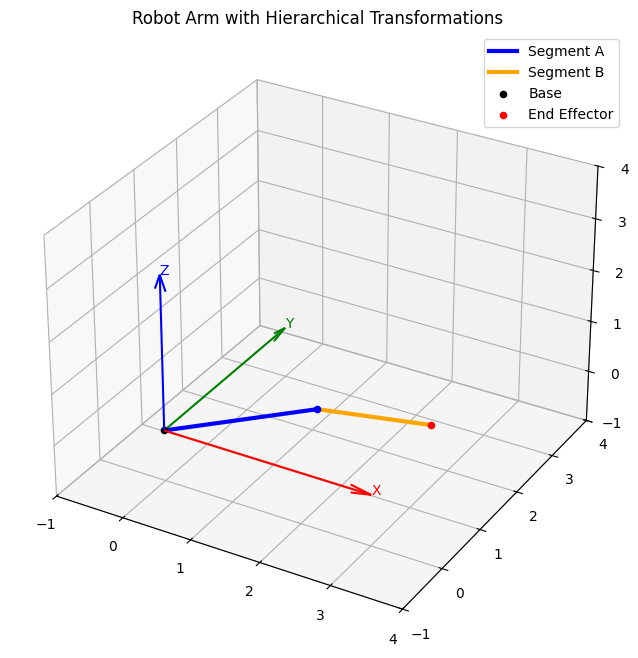

In [ ]:
# Robot Arm - Hierarchical Transformations

# Base point in homogeneous coordinates (origin of the robot arm)
base_point = np.array([0, 0, 0, 1])

# Segment lengths
L1 = 2.0  # length of segment A
L2 = 1.5  # length of segment B

# Joint angles (in radians)
theta1 = np.pi / 4   # 45° rotation of segment A around Z-axis
theta2 = -np.pi / 6  # -30° rotation of segment B around Z-axis (relative to segment A)

# Transformation of Segment A (rotate + translate)
R1 = rotation_matrix_z(theta1)
T1 = translation_matrix(L1, 0, 0)
M1 = R1 @ T1  # First segment moves out along x-axis, then rotates

# Transformation of Segment B (relative to the end of Segment A)
R2 = rotation_matrix_z(theta2)
T2 = translation_matrix(L2, 0, 0)
M2 = R2 @ T2  # Second segment rotates then extends

# Combine transformations
M_total = M1 @ M2

# Compute end effector position
end_effector = M_total @ base_point

# Plot the robot arm
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
draw_axes(ax, length=3)

# Plot segment A
origin = base_point[:3]
joint_A = (R1 @ np.array([L1, 0, 0, 1]))[:3]
ax.plot([origin[0], joint_A[0]], [origin[1], joint_A[1]], [origin[2], joint_A[2]], color='blue', linewidth=3, label='Segment A')

# Plot segment B
joint_B = end_effector[:3]
ax.plot([joint_A[0], joint_B[0]], [joint_A[1], joint_B[1]], [joint_A[2], joint_B[2]], color='orange', linewidth=3, label='Segment B')

# Mark points
ax.scatter(*origin, color='black', label='Base')
ax.scatter(*joint_A, color='blue')
ax.scatter(*joint_B, color='red', label='End Effector')

ax.set_xlim([-1, 4])
ax.set_ylim([-1, 4])
ax.set_zlim([-1, 4])
ax.set_title("Robot Arm with Hierarchical Transformations")
ax.legend()
plt.show()

# Student Tasks:



## Task 1: Construct and Transform a Custom Shape (e.g., House Roof)

1. Use the cube geometry from the previous task, defined as 8 vertices in homogeneous coordinates (cube_points).

2. Define an orbit angle, e.g., 45° (π/4 radians), representing the cube’s position on a circular orbit path.

3. Construct two transformation matrices:
* Translation matrix to move the cube to a point on a circular orbit of radius r = 3 units around the origin.
* Rotation matrix to rotate the cube around its own Z-axis by the same angle.

4. Combine the two matrices in the correct order:
* First rotate the cube about its center (local rotation)
* Then translate it to its orbit position

5. Apply the combined transformation to all the cube’s vertices.
6. Visualize the result using matplotlib, showing the rotated and orbiting cube.

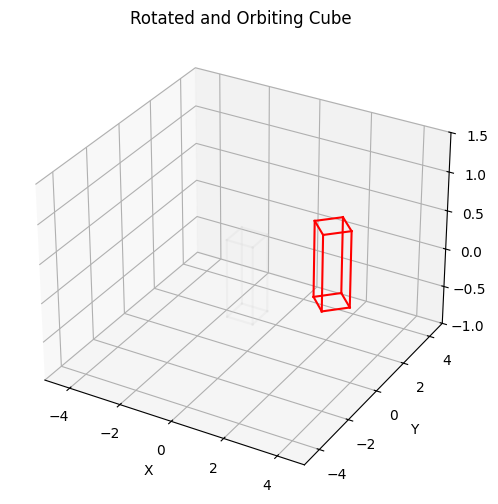

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define cube vertices in homogeneous coordinates (8 corners)
cube_points = np.array([
    [-0.5, -0.5, -0.5, 1],
    [ 0.5, -0.5, -0.5, 1],
    [ 0.5,  0.5, -0.5, 1],
    [-0.5,  0.5, -0.5, 1],
    [-0.5, -0.5,  0.5, 1],
    [ 0.5, -0.5,  0.5, 1],
    [ 0.5,  0.5,  0.5, 1],
    [-0.5,  0.5,  0.5, 1],
]).T  # Shape: (4, 8) for matrix operations

# Orbit angle (45° in radians)
theta = np.pi / 4
radius = 3

# --- Transformation Matrices ---

# 1. Rotation around the Z-axis (local rotation)
rotation_z = np.array([
    [np.cos(theta), -np.sin(theta), 0, 0],
    [np.sin(theta),  np.cos(theta), 0, 0],
    [0,              0,             1, 0],
    [0,              0,             0, 1],
])

# 2. Translation to a point on a circular orbit
translation = np.array([
    [1, 0, 0, radius * np.cos(theta)],
    [0, 1, 0, radius * np.sin(theta)],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
])

# 3. Combine transformations: rotate first, then translate
combined_transform = translation @ rotation_z

# 4. Apply transformation to all cube points
transformed_points = combined_transform @ cube_points

# --- Visualization ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Original cube (gray)
def draw_cube(ax, points, color='gray', alpha=0.3):
    edges = [
        (0,1), (1,2), (2,3), (3,0),  # bottom square
        (4,5), (5,6), (6,7), (7,4),  # top square
        (0,4), (1,5), (2,6), (3,7)   # vertical edges
    ]
    for edge in edges:
        xs, ys, zs = points[0, list(edge)], points[1, list(edge)], points[2, list(edge)]
        ax.plot(xs, ys, zs, color=color, alpha=alpha)

# Draw original cube at origin
draw_cube(ax, cube_points, color='lightgray', alpha=0.2)

# Draw transformed cube (red)
draw_cube(ax, transformed_points, color='red', alpha=1.0)

# Set axis limits and labels
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-1, 1.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Rotated and Orbiting Cube")

plt.show()


## Task 2: Orbiting Cube with Self-Rotation

Create a transformation that moves a cube in a circular orbit around the origin, while the cube also rotates around its own center. This task simulates combined global and local transformations and deepens your understanding of the order of matrix operations.

1. Start with a unit cube: Use the cube defined by 8 vertices in homogeneous coordinates from the earlier example (cube_points).
2. Define the orbit angle: Choose an angle in radians (e.g., π/4, which is 45°) that represents the cube's position along the circular orbit.
3. Create a rotation matrix: Use rotation_matrix_z(angle) to rotate the cube around its own Z-axis. This represents the self-rotation of the cube.
4. Create a translation matrix: Use translation_matrix(x, y, z) to place the cube at a point on a circle with radius r = 3.
The coordinates should be:
* x = 3 * cos(angle)
* y = 3 * sin(angle)
* z = 0

This simulates the cube orbiting around the origin in the XY-plane.
5. Combine the transformations: Multiply the matrices in the correct order:  `combined = T_orbit @ R_self`
This order first rotates the cube around its own center, then translates it into the orbit position.
6. Transform all cube vertices: Multiply the combined transformation matrix by the cube’s vertex matrix.
7. Visualize: Use matplotlib to plot the transformed cube. Draw coordinate axes using a helper like draw_axes(ax) and use a 3D scatter plot to show the result.

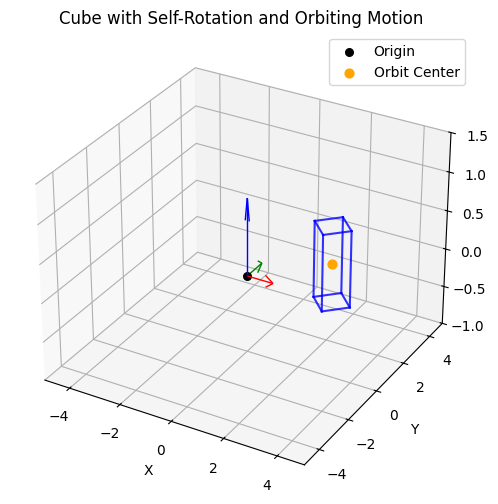

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === Helper functions ===

def rotation_matrix_z(angle):
    return np.array([
        [np.cos(angle), -np.sin(angle), 0, 0],
        [np.sin(angle),  np.cos(angle), 0, 0],
        [0,              0,             1, 0],
        [0,              0,             0, 1],
    ])

def translation_matrix(x, y, z):
    return np.array([
        [1, 0, 0, x],
        [0, 1, 0, y],
        [0, 0, 1, z],
        [0, 0, 0, 1],
    ])

def draw_cube(ax, points, color='blue', alpha=1.0):
    edges = [
        (0,1), (1,2), (2,3), (3,0),  # bottom square
        (4,5), (5,6), (6,7), (7,4),  # top square
        (0,4), (1,5), (2,6), (3,7)   # vertical edges
    ]
    for edge in edges:
        xs, ys, zs = points[0, list(edge)], points[1, list(edge)], points[2, list(edge)]
        ax.plot(xs, ys, zs, color=color, alpha=alpha)

def draw_axes(ax, length=1.0):
    ax.quiver(0, 0, 0, length, 0, 0, color='r', linewidth=1)  # X axis
    ax.quiver(0, 0, 0, 0, length, 0, color='g', linewidth=1)  # Y axis
    ax.quiver(0, 0, 0, 0, 0, length, color='b', linewidth=1)  # Z axis

# === Cube Definition ===

cube_points = np.array([
    [-0.5, -0.5, -0.5, 1],
    [ 0.5, -0.5, -0.5, 1],
    [ 0.5,  0.5, -0.5, 1],
    [-0.5,  0.5, -0.5, 1],
    [-0.5, -0.5,  0.5, 1],
    [ 0.5, -0.5,  0.5, 1],
    [ 0.5,  0.5,  0.5, 1],
    [-0.5,  0.5,  0.5, 1],
]).T  # Shape: (4, 8)

# === Transformation Parameters ===

theta = np.pi / 4  # 45 degrees
radius = 3
x = radius * np.cos(theta)
y = radius * np.sin(theta)
z = 0

# === Build Transformation Matrices ===

R_self = rotation_matrix_z(theta)                  # Local rotation around Z-axis
T_orbit = translation_matrix(x, y, z)              # Global translation for orbit
combined_transform = T_orbit @ R_self              # Apply self-rotation first, then orbit

# === Apply transformation ===

transformed_points = combined_transform @ cube_points

# === Visualization ===

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

draw_axes(ax)
draw_cube(ax, transformed_points, color='blue', alpha=0.8)

# Mark center/origin
ax.scatter([0], [0], [0], color='black', s=30, label='Origin')

# Show transformed cube center (orbit location)
ax.scatter([x], [y], [z], color='orange', s=40, label='Orbit Center')

# Axis settings
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-1, 1.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Cube with Self-Rotation and Orbiting Motion")
ax.legend()

plt.show()


## Task 3: Simulate a 3-Joint Robotic Arm Using Homogeneous Transformations

Build a simple robotic arm consisting of three connected segments (links), each capable of rotating around its respective joint. Using homogeneous transformation matrices, calculate the position of each joint and the final end effector, then visualize the result in 3D.

1. **Define segment lengths**  
   Each link of the robotic arm has a specific length:
   ```python
   L1, L2, L3 = 2, 1.5, 1

2. Set joint angles (in radians):
Assign rotation angles for each joint: $θ_1$ 30 degrees, $θ_2$ 45 degrees, $θ_3$ = -30 degrees.

3. Construct transformation matrices. Each segment undergoes a rotation followed by a translation along the X-axis:
```
M1 = rotation_matrix_z(θ1) ⋅ translation_matrix(L1, 0, 0)
M2 = rotation_matrix_z(θ2) ⋅ translation_matrix(L2, 0, 0)
M3 = rotation_matrix_z(θ3) ⋅ translation_matrix(L3, 0, 0)
```
4. Compute positions of the joints and end effector. Use chained transformations to find the position of each joint:

```
joint1 = M1 @ [0, 0, 0, 1]                # End of Segment 1  
joint2 = M1 @ M2 @ [0, 0, 0, 1]           # End of Segment 2  
effector = M1 @ M2 @ M3 @ [0, 0, 0, 1]    # End effector
```
5. Plot the robotic arm in 3D using Matplotlib:
* Draw each segment as a 3D line: segment 1: blue, segment 2: green, segment 3: red.
Mark the end effector with a magenta point. Use a helper function like draw_axes(ax) to show the coordinate system.

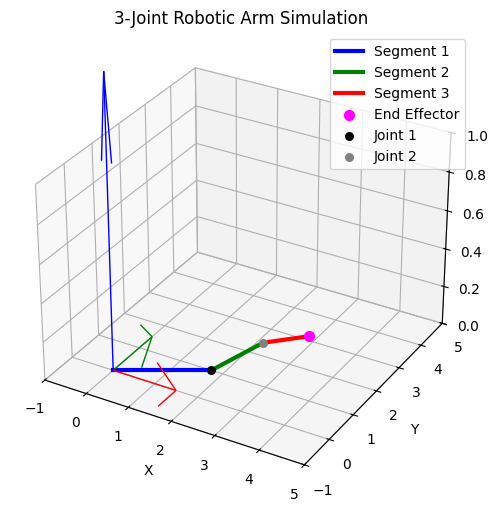

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Helper Functions ---

def rotation_matrix_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta),  np.cos(theta), 0, 0],
        [0,              0,             1, 0],
        [0,              0,             0, 1],
    ])

def translation_matrix(x, y, z):
    return np.array([
        [1, 0, 0, x],
        [0, 1, 0, y],
        [0, 0, 1, z],
        [0, 0, 0, 1],
    ])

def draw_axes(ax, length=1.5):
    ax.quiver(0, 0, 0, length, 0, 0, color='r', linewidth=1)  # X
    ax.quiver(0, 0, 0, 0, length, 0, color='g', linewidth=1)  # Y
    ax.quiver(0, 0, 0, 0, 0, length, color='b', linewidth=1)  # Z

# --- Segment Lengths ---
L1, L2, L3 = 2.0, 1.5, 1.0

# --- Joint Angles (convert degrees to radians) ---
θ1 = np.radians(30)
θ2 = np.radians(45)
θ3 = np.radians(-30)

# --- Build Transformation Matrices ---
M1 = rotation_matrix_z(θ1) @ translation_matrix(L1, 0, 0)
M2 = rotation_matrix_z(θ2) @ translation_matrix(L2, 0, 0)
M3 = rotation_matrix_z(θ3) @ translation_matrix(L3, 0, 0)

# --- Compute Joint Positions ---
origin = np.array([0, 0, 0, 1])
joint1 = M1 @ origin
joint2 = M1 @ M2 @ origin
effector = M1 @ M2 @ M3 @ origin

# --- Collect Points for Plotting ---
points = np.array([
    origin[:3],
    joint1[:3],
    joint2[:3],
    effector[:3]
]).T  # Shape: (3, 4) for plotting (X, Y, Z)

# --- Plot the Robotic Arm ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
draw_axes(ax)

# Draw segments
ax.plot(points[0, 0:2], points[1, 0:2], points[2, 0:2], color='blue', linewidth=3, label='Segment 1')
ax.plot(points[0, 1:3], points[1, 1:3], points[2, 1:3], color='green', linewidth=3, label='Segment 2')
ax.plot(points[0, 2:4], points[1, 2:4], points[2, 2:4], color='red', linewidth=3, label='Segment 3')

# Mark joints and end effector
ax.scatter(*effector[:3], color='magenta', s=50, label='End Effector')
ax.scatter(*joint1[:3], color='black', s=30, label='Joint 1')
ax.scatter(*joint2[:3], color='gray', s=30, label='Joint 2')

# Configure axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3-Joint Robotic Arm Simulation')
ax.legend()
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_zlim(0, 1)  # No Z motion in this case

plt.show()


## Part 2: 3D Object Modeling and Parametric Surfaces

In computer graphics, 3D object modeling is the process of representing three-dimensional objects using mathematical constructs such as vertices, edges, surfaces, and equations. This lab explores two key approaches:

---

#### 1. **Procedural Geometry**

Procedural geometry involves generating shapes algorithmically using basic mathematical definitions and loops. For example:

- A **cube** can be constructed from 8 vertices and 12 edges.
- A **sphere** can be generated using spherical coordinates:
  $$
  \begin{aligned}
  x &= \cos(u) \cdot \sin(v) \\\\
  y &= \sin(u) \cdot \sin(v) \\\\
  z &= \cos(v)
  \end{aligned}
  $$
- A **cylinder** can be defined as a circle extruded along the Z-axis.

These shapes are useful for testing rendering systems and building simple models.

---

#### 2. **Parametric Modeling**

Parametric surfaces are defined using one or more parameters to describe points on the surface. Unlike procedural geometry, parametric models offer more flexibility and can represent smooth and complex surfaces.

- A **torus** (donut shape) is defined with major radius \( R \) and minor radius \( r \):
  $$
  \begin{aligned}
  x &= (R + r \cos(v)) \cos(u) \\\\
  y &= (R + r \cos(v)) \sin(u) \\\\
  z &= r \sin(v)
  \end{aligned}
  $$

- A **superellipsoid** generalizes the sphere and cube using exponential control parameters $n_1$ and $n_2$:
  $$
  \begin{aligned}
  x &= a \cdot (\cos(u))^{n_1} \cdot (\cos(v))^{n_2} \\\\
  y &= b \cdot (\sin(u))^{n_1} \cdot (\cos(v))^{n_2} \\\\
  z &= c \cdot (\sin(v))^{n_2}
  \end{aligned}
  $$

The exponents $n_1$ and $n_2$ control the shape’s roundness or squareness.

---

#### 3. **Vertex Arrays and Normals**

In real-time rendering and shading, we often work with **vertex arrays** and compute **normal vectors** for lighting. A normal vector is perpendicular to a surface and is used for lighting calculations.

To compute normals:
- Calculate partial derivatives in two directions (via gradients)
- Use the **cross product** to obtain the perpendicular vector
- Normalize the result

Normals are essential in lighting models like **Phong** or **Blinn-Phong** for realistic shading.

---

By combining procedural and parametric modeling, as well as computing vertex normals, we gain full control over the geometry and appearance of 3D objects.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# --- Utility Function to Plot 3D Surface ---
def plot_surface(X, Y, Z, title="3D Surface", cmap="viridis"):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor='k', linewidth=0.3)
    ax.set_title(title)
    plt.show()

### Procedural Geometry: Cube

In this example, a cube is generated procedurally by explicitly defining its **8 corner vertices** in 3D space and connecting them using **12 edges**. Each vertex is represented as a 3D point \((x, y, z)\), and the edges are defined as pairs of indices referencing the vertices. This method demonstrates how complex 3D shapes can be built from basic geometric primitives using simple arrays and loops.

The cube is plotted using `matplotlib`’s 3D plotting tools by iterating through the list of edges and drawing lines between corresponding vertex pairs. Procedural geometry like this forms the foundation for constructing more advanced objects and is especially useful in game development, modeling, and simulation environments.


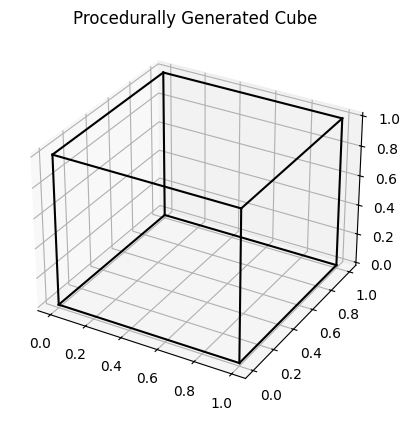

In [11]:
# --- Part 1: Procedural Geometry ---
# 1. Cube
cube_vertices = np.array([
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
    [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
])
cube_edges = [
    (0,1), (1,2), (2,3), (3,0),
    (4,5), (5,6), (6,7), (7,4),
    (0,4), (1,5), (2,6), (3,7)
]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for e in cube_edges:
    x = [cube_vertices[e[0]][0], cube_vertices[e[1]][0]]
    y = [cube_vertices[e[0]][1], cube_vertices[e[1]][1]]
    z = [cube_vertices[e[0]][2], cube_vertices[e[1]][2]]
    ax.plot(x, y, z, 'k')
ax.set_title("Procedurally Generated Cube")
plt.show()

### Procedural Geometry: Sphere (Spherical Coordinates)

This example demonstrates how to generate a sphere using **spherical coordinates**, a common technique in 3D graphics. Two angular parameters, \( u \in [0, 2\pi] \) (azimuthal angle) and \( v \in [0, \pi] \) (polar angle), are used to cover the surface of the sphere. The 3D coordinates are calculated using the parametric equations:

$$
\begin{aligned}
x &= \cos(u) \cdot \sin(v) \\\\
y &= \sin(u) \cdot \sin(v) \\\\
z &= \cos(v)
\end{aligned}
$$

By generating a mesh grid over \( u \) and \( v \), a smooth spherical surface is constructed. This method is widely used in computer graphics to model round objects like planets,

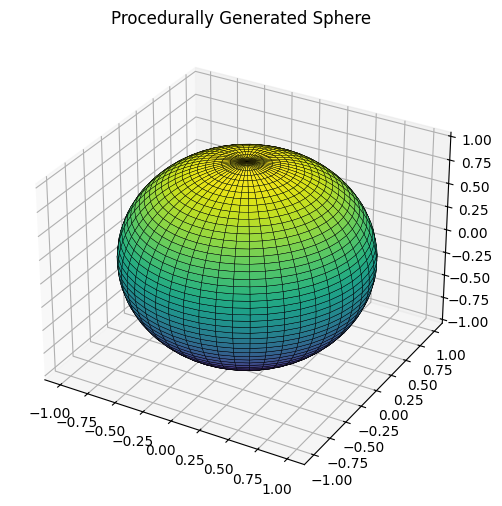

In [ ]:
# 2. Sphere (using spherical coordinates)
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
U, V = np.meshgrid(u, v)
X = np.cos(U) * np.sin(V)
Y = np.sin(U) * np.sin(V)
Z = np.cos(V)
plot_surface(X, Y, Z, title="Procedurally Generated Sphere")

### Procedural Geometry: Cylinder

This example creates a vertical cylinder using **cylindrical coordinates**. The angle $\theta \in [0, 2\pi]$ defines the circular base, while $z \in [0, 1]$ sets the height. By generating a mesh grid of $\theta$ and $z$, and mapping $x = \cos(\theta)$, $y = \sin(\theta)$, the cylinder surface is formed. This method is commonly used for modeling tubes, pipes, and columns in 3D graphics.


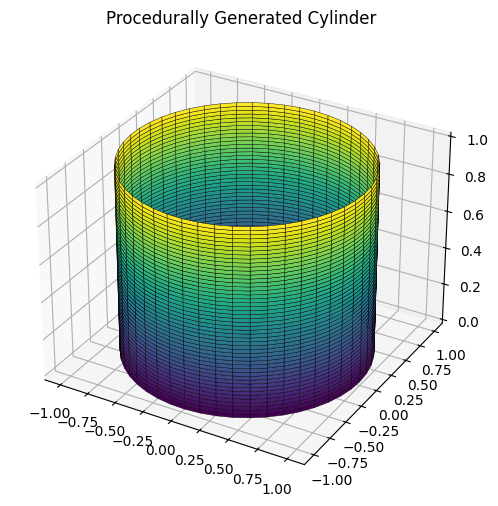

In [ ]:
# 3. Cylinder
z = np.linspace(0, 1, 50)
theta = np.linspace(0, 2 * np.pi, 50)
Theta, Z = np.meshgrid(theta, z)
X = np.cos(Theta)
Y = np.sin(Theta)
plot_surface(X, Y, Z, title="Procedurally Generated Cylinder")

### Parametric Modeling: Superellipsoid and Torus

Parametric modeling defines surfaces using mathematical equations with one or more parameters. In this part, two parametric shapes are explored:

- **Superellipsoid**: A generalization of ellipsoids and cubes, controlled by exponents \( n_1 \) and \( n_2 \). These parameters influence the shape's roundness or squareness. The surface is generated by applying power operations on trigonometric functions over a 2D parameter grid.

- **Torus**: A classic donut-shaped surface defined by two radii — a major radius \( R \) and a minor radius \( r \). Using two angular parameters, the torus is generated with trigonometric functions that sweep a circle around a larger circular path.

These surfaces allow flexible control over shape and are widely used in modeling, animation, and scientific visualization.

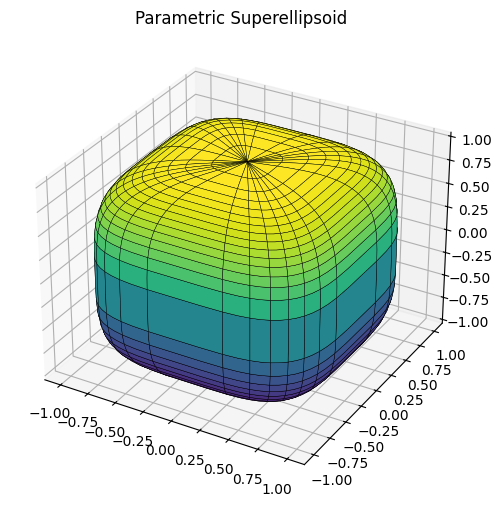

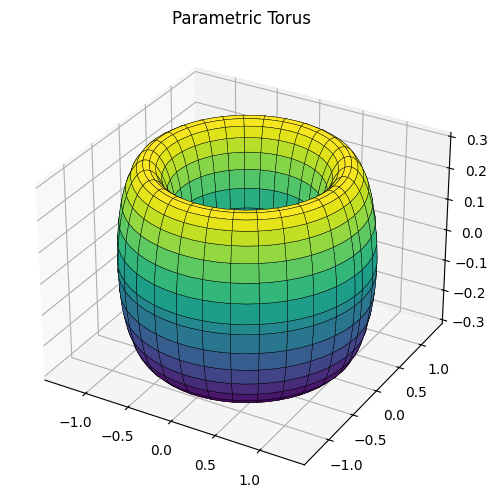

In [ ]:
# --- Part 2: Parametric Modeling ---
# 1. Superellipsoid
n1, n2 = 0.5, 0.5  # adjust for shape complexity

def superellipsoid(u, v, a=1, b=1, c=1):
    cosu = np.cos(u)
    sinu = np.sin(u)
    cosv = np.cos(v)
    sinv = np.sin(v)

    def sgn(x): return np.sign(x)
    def exp(x, n): return sgn(x) * (np.abs(x) ** n)

    x = a * exp(cosu, n1) * exp(cosv, n2)
    y = b * exp(sinu, n1) * exp(cosv, n2)
    z = c * exp(sinv, n2)
    return x, y, z

u = np.linspace(-np.pi, np.pi, 60)
v = np.linspace(-np.pi/2, np.pi/2, 60)
U, V = np.meshgrid(u, v)
X, Y, Z = superellipsoid(U, V)
plot_surface(X, Y, Z, title="Parametric Superellipsoid")

# 2. Torus

def torus(R=1, r=0.3):
    u = np.linspace(0, 2 * np.pi, 60)
    v = np.linspace(0, 2 * np.pi, 60)
    u, v = np.meshgrid(u, v)
    X = (R + r * np.cos(v)) * np.cos(u)
    Y = (R + r * np.cos(v)) * np.sin(u)
    Z = r * np.sin(v)
    return X, Y, Z

X, Y, Z = torus()
plot_surface(X, Y, Z, title="Parametric Torus")

### Vertex Arrays and Normals

In this example, **vertex normals** are computed for a torus surface to enable lighting and shading in 3D rendering. Normals are vectors perpendicular to the surface at each vertex and are crucial for realistic illumination. The method uses numerical gradients to estimate surface tangents, then computes the **cross product** to obtain normals. These normals are normalized and visualized using 3D arrows, illustrating the surface orientation at various points. This technique is widely used in computer graphics, especially in shading models like Phong and Blinn-Phong.


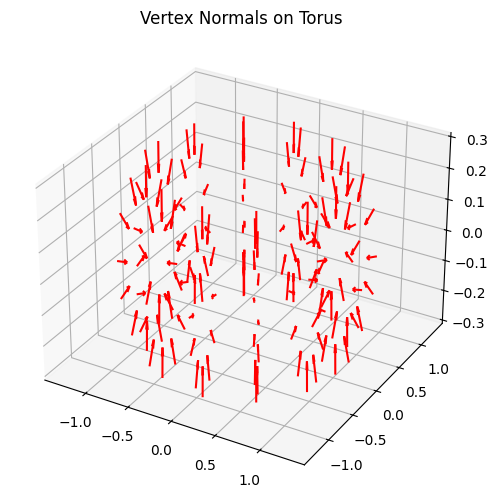

In [ ]:
# --- Part 3: Vertex Arrays and Normals ---
# Example: Compute vertex normals for the torus
from numpy.linalg import norm

def compute_normals(X, Y, Z):
    U = np.stack((X, Y, Z), axis=-1)
    normals = np.zeros_like(U)
    dx = np.gradient(U, axis=0)
    dy = np.gradient(U, axis=1)
    cross = np.cross(dx, dy)
    n = norm(cross, axis=-1)
    n[n == 0] = 1
    normals = cross / n[..., np.newaxis]
    return normals

normals = compute_normals(X, Y, Z)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X[::5,::5], Y[::5,::5], Z[::5,::5],
          normals[::5,::5,0], normals[::5,::5,1], normals[::5,::5,2],
          length=0.1, color='red')
ax.set_title("Vertex Normals on Torus")
plt.show()

## Task 4: Explore Superellipsoid Shape by Varying Parameters

Modify the values of $n_1$ and $n_2$ in the superellipsoid function to observe how the shape transitions between spherical, cuboidal, and star-like forms.

- Use three different combinations of $n_1$ and $n_2$
- Plot the surface for each variation
- Describe how changing each parameter affects the curvature

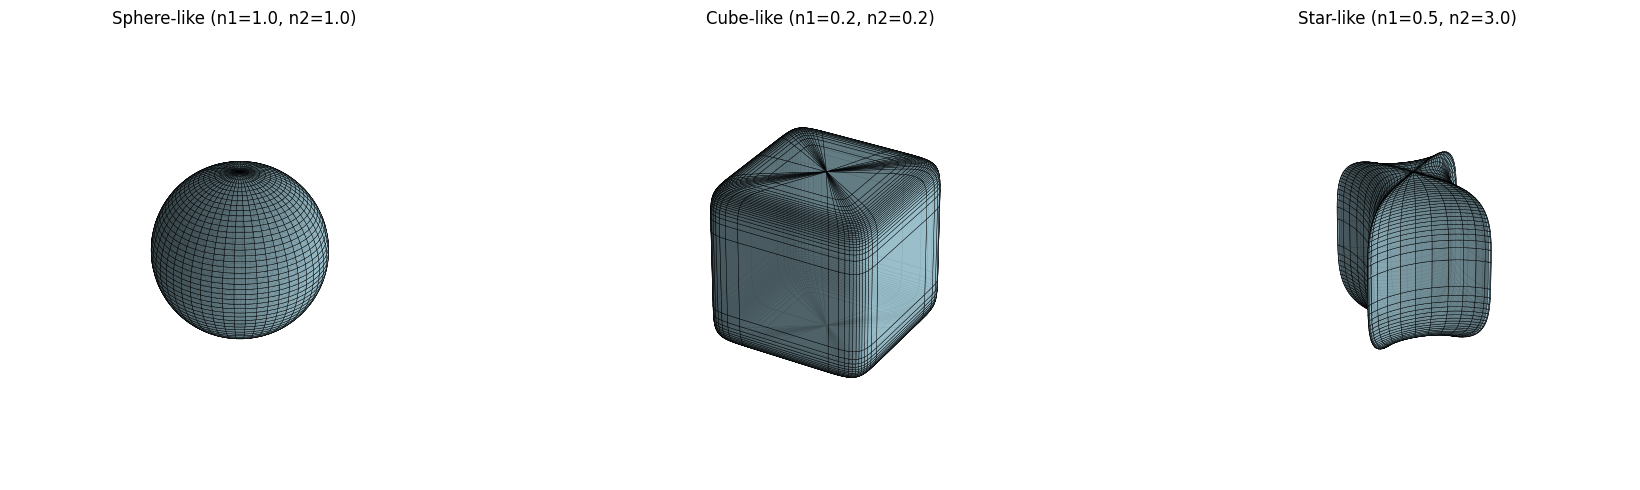

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def superellipsoid(a, b, c, n1, n2, resolution=100):
    u = np.linspace(-np.pi / 2, np.pi / 2, resolution)
    v = np.linspace(-np.pi, np.pi, resolution)
    u, v = np.meshgrid(u, v)

    def sgn(x):
        return np.sign(x)

    x = a * sgn(np.cos(u)) * (np.abs(np.cos(u)) ** n1) * sgn(np.cos(v)) * (np.abs(np.cos(v)) ** n2)
    y = b * sgn(np.cos(u)) * (np.abs(np.cos(u)) ** n1) * sgn(np.sin(v)) * (np.abs(np.sin(v)) ** n2)
    z = c * sgn(np.sin(u)) * (np.abs(np.sin(u)) ** n1)

    return x, y, z

# Parameters for each shape
params = [
    (1, 1),     # Sphere-like
    (0.2, 0.2), # Cube-like
    (0.5, 3.0)  # Star-like
]

titles = ["Sphere-like (n1=1.0, n2=1.0)",
          "Cube-like (n1=0.2, n2=0.2)",
          "Star-like (n1=0.5, n2=3.0)"]

fig = plt.figure(figsize=(18, 5))

for i, (n1, n2) in enumerate(params):
    x, y, z = superellipsoid(1, 1, 1, n1, n2)

    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.plot_surface(x, y, z, color='lightblue', edgecolor='k', linewidth=0.3, alpha=0.9)
    ax.set_title(titles[i])
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)
    ax.set_box_aspect([1, 1, 1])
    ax.axis('off')

plt.tight_layout()
plt.show()


n1 - Kontrolira oblik vertikalno (je li vrh zaobljen ili ravan)

n2 - Kontrolira oblik horizontalno ( rubovi oštri, zaobljeni ili čak kombinirano)


## Task 5: Create a Parametric Cone

Build a parametric model of a vertical cone using parameters $\theta$ (angle) and $h$ (height). The radius should linearly decrease from base to tip.

Use the following mapping:
- $ x = r(h) \cdot \cos(\theta) $
- $ y = r(h) \cdot \sin(\theta) $
- $ z = h $

Where $ r(h) = 1 - h $. Plot the 3D cone using a surface plot.


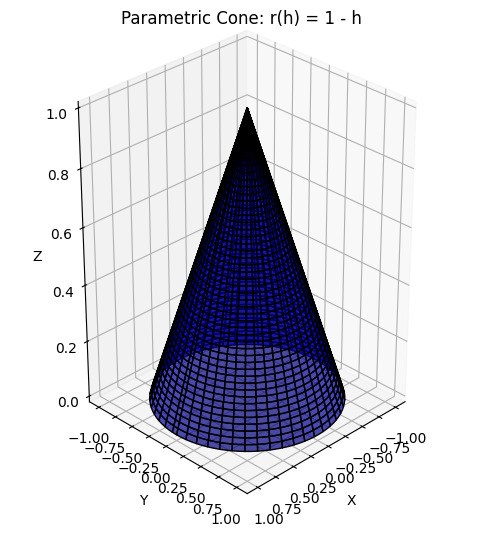

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create grid
theta = np.linspace(0, 2 * np.pi, 100)
h = np.linspace(0, 1, 50)
theta, h = np.meshgrid(theta, h)

# Parametric cone equations
r = 1 - h
x = r * np.cos(theta)
y = r * np.sin(theta)
z = h

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Cone surface
ax.plot_surface(x, y, z, color='blue', edgecolor='k', alpha=0.7)

# Labels and view
ax.set_title('Parametric Cone: r(h) = 1 - h')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1.5])
ax.view_init(elev=30, azim=45)

plt.show()
